In [2]:
!pip install ucimlrepo


Fetch Data From Unirepo

In [26]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
communities_and_crime = fetch_ucirepo(id=183)  #This is a function provided by the ucimlrepo Python library. It allows you to download datasets directly from the UCI repository using their unique IDs.
# data (as pandas dataframes)
X = communities_and_crime.data.features
y = communities_and_crime.data.targets

# metadata
#print(communities_and_crime.metadata)

# variable information
#print(communities_and_crime.variables)

print("this is X ", X)



this is X        state county community        communityname  fold  population  \
0         8      ?         ?         Lakewoodcity     1        0.19   
1        53      ?         ?          Tukwilacity     1        0.00   
2        24      ?         ?         Aberdeentown     1        0.00   
3        34      5     81440  Willingborotownship     1        0.04   
4        42     95      6096    Bethlehemtownship     1        0.01   
...     ...    ...       ...                  ...   ...         ...   
1989     12      ?         ?    TempleTerracecity    10        0.01   
1990      6      ?         ?          Seasidecity    10        0.05   
1991      9      9     80070        Waterburytown    10        0.16   
1992     25     17     72600          Walthamcity    10        0.08   
1993      6      ?         ?          Ontariocity    10        0.20   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  \
0              0.33          0.02          0.90          0.12  ...

In [27]:

X.dropna(inplace=True)  # Remove rows with missing values


<ipython-input-27-ea8d664b01f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)  # Remove rows with missing values


Data Characterization

In [28]:
print("Characterization:") #Data Characterization refers to the process of analyzing the dataset to understand its structure, distribution, and key statistics.
print(X.describe())


Characterization:
             state         fold   population  householdsize  racepctblack  \
count  1994.000000  1994.000000  1994.000000    1994.000000   1994.000000   
mean     28.683551     5.493982     0.057593       0.463395      0.179629   
std      16.397553     2.873694     0.126906       0.163717      0.253442   
min       1.000000     1.000000     0.000000       0.000000      0.000000   
25%      12.000000     3.000000     0.010000       0.350000      0.020000   
50%      34.000000     5.000000     0.020000       0.440000      0.060000   
75%      42.000000     8.000000     0.050000       0.540000      0.230000   
max      56.000000    10.000000     1.000000       1.000000      1.000000   

       racePctWhite  racePctAsian  racePctHisp  agePct12t21  agePct12t29  ...  \
count   1994.000000   1994.000000  1994.000000  1994.000000  1994.000000  ...   
mean       0.753716      0.153681     0.144022     0.424218     0.493867  ...   
std        0.244039      0.208877     0.23249

Columns in X: Index(['state', 'county', 'community', 'communityname', 'fold', 'population',
       'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       ...
       'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans',
       'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop'],
      dtype='object', length=127)
'target' column not found. Proceeding with current DataFrame.


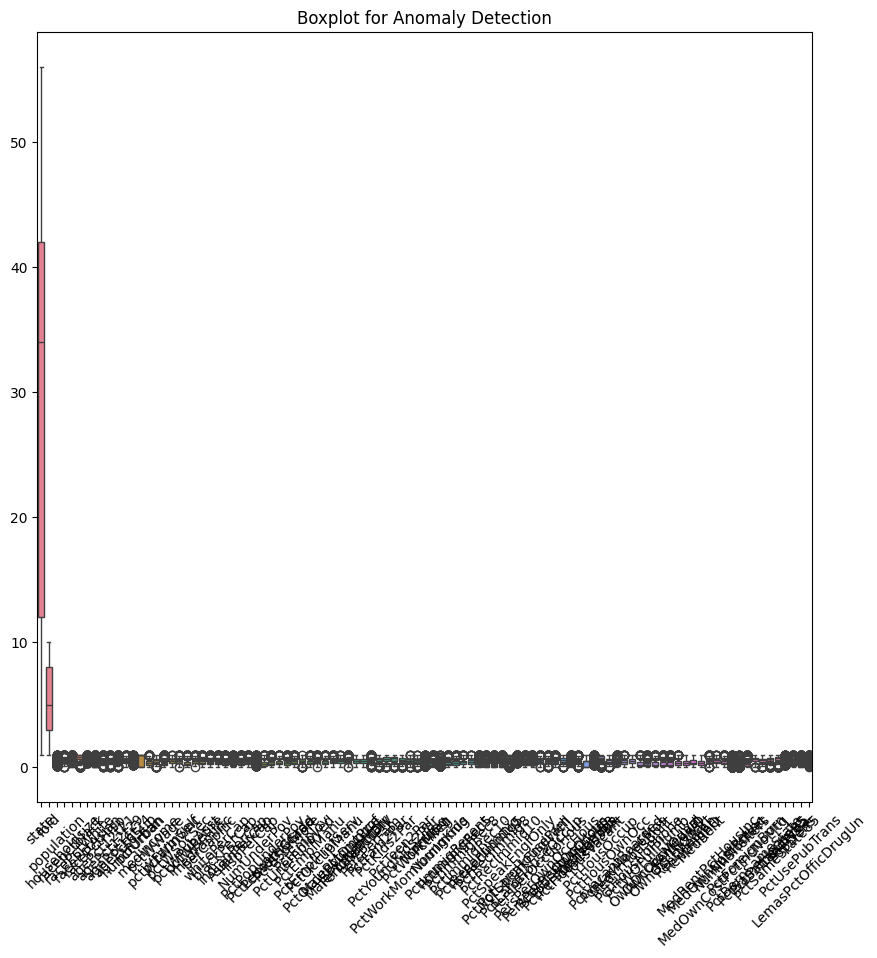

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `X` is your DataFrame and target column is already separated.
# If `target` column exists, drop it; otherwise, proceed with `X` as is.
try:
    # Print columns to check the structure of X
    print("Columns in X:", X.columns)

    # Drop 'target' if it exists
    if 'target' in X.columns:
        X = X.drop(columns='target')
        print("'target' column dropped.")
    else:
        print("'target' column not found. Proceeding with current DataFrame.")

    # Plot boxplot
    plt.figure(figsize=(10, 10))
    sns.boxplot(data=X)
    plt.title('Boxplot for Anomaly Detection')
    plt.xticks(rotation=45)
    plt.show()

except KeyError as e:
    print(f"KeyError: {e}. Please ensure the column name is correct.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


DATA VISUALIZATION

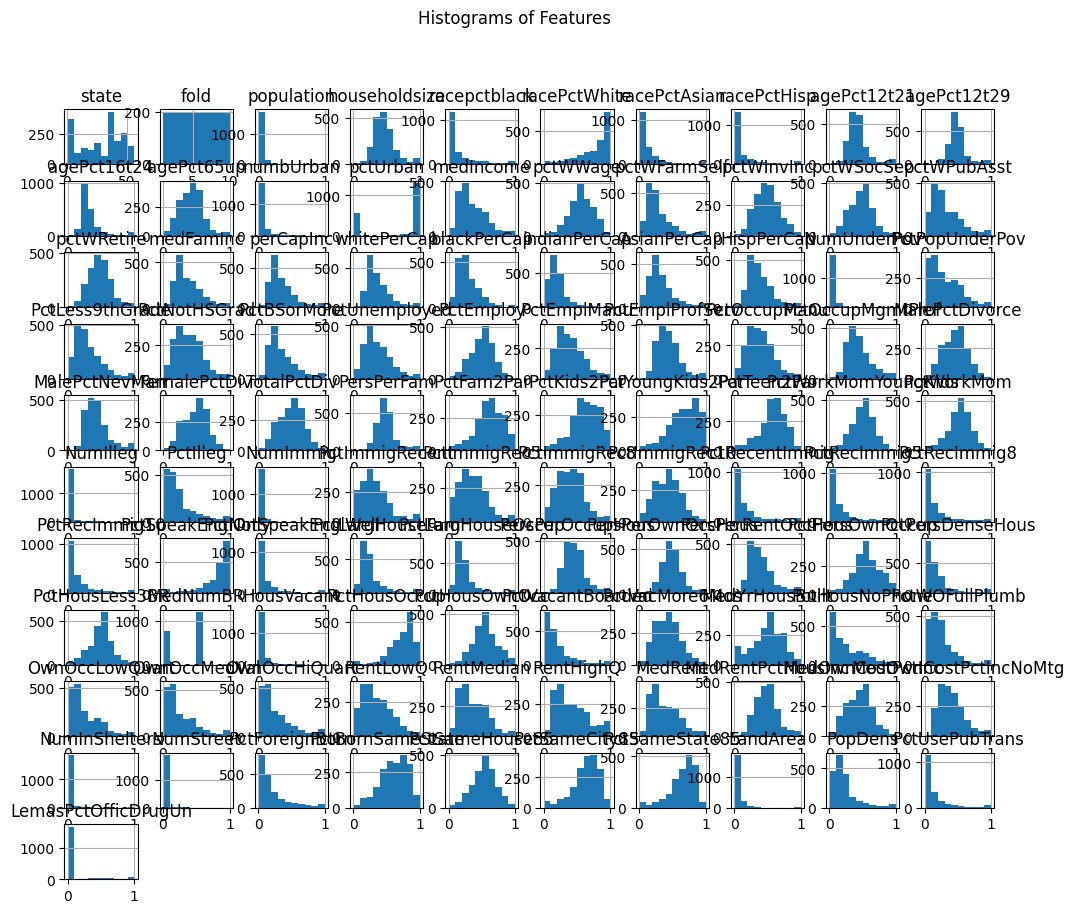

In [30]:
X.hist(figsize=(12, 10))
plt.suptitle('Histograms of Features')
plt.show()


In [ ]:
import seaborn as sns

sns.pairplot(data=X, hue='target')
plt.title('Pairplot of Features')
plt.show()


Numeric Features: Index(['state', 'fold', 'population', 'householdsize', 'racepctblack',
       'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21',
       'agePct12t29',
       ...
       'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85',
       'PctSameCity85', 'PctSameState85', 'LandArea', 'PopDens',
       'PctUsePubTrans', 'LemasPctOfficDrugUn'],
      dtype='object', length=101)


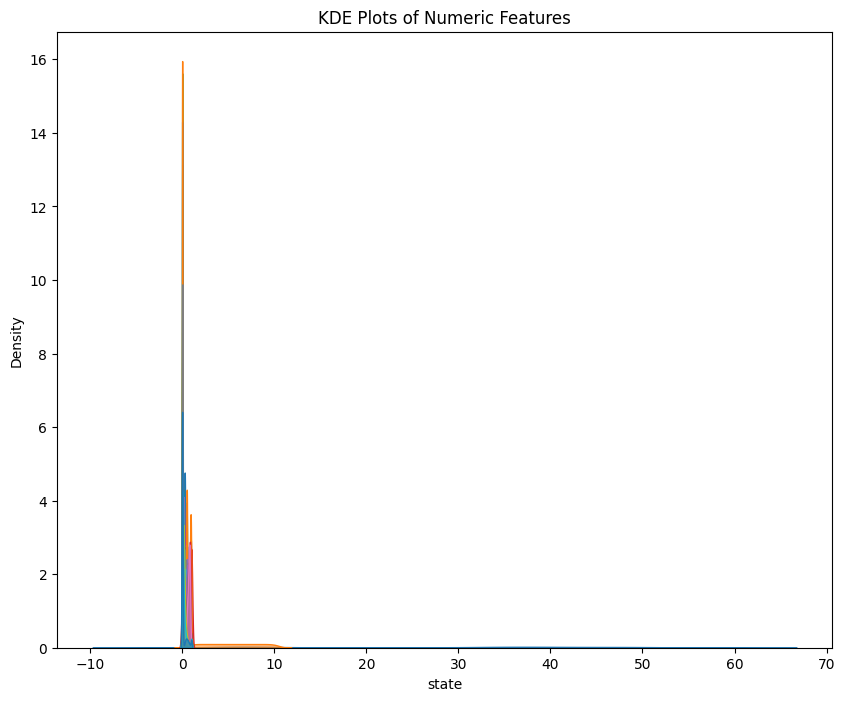

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X is your DataFrame
# Select only numeric columns for plotting
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
print("Numeric Features:", numeric_features)

plt.figure(figsize=(10, 8))

for feature in numeric_features:
    sns.kdeplot(data=X, x=feature, fill=True, alpha=0.5)

plt.title('KDE Plots of Numeric Features')  # Changed title to reflect the plot type
plt.show()


First few rows of the dataset:
   state county community        communityname  fold  population  \
0      8      ?         ?         Lakewoodcity     1        0.19   
1     53      ?         ?          Tukwilacity     1        0.00   
2     24      ?         ?         Aberdeentown     1        0.00   
3     34      5     81440  Willingborotownship     1        0.04   
4     42     95      6096    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  \
0           0.33          0.02          0.90          0.12  ...   
1           0.16          0.12          0.74          0.45  ...   
2           0.42          0.49          0.56          0.17  ...   
3           0.77          1.00          0.08          0.12  ...   
4           0.55          0.02          0.95          0.09  ...   

   PolicAveOTWorked  LandArea  PopDens  PctUsePubTrans  PolicCars  \
0              0.29      0.12     0.26            0.20       0.06   
1                 ?

<ipython-input-33-ddf022f75989>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace("?", float("nan"), inplace=True)  # Replace "?" with NaN


             state       county     community  communityname         fold  \
count  1994.000000  1994.000000   1994.000000            0.0  1994.000000   
mean     28.683551    58.826829  46188.336597            NaN     5.493982   
std      16.397553    81.041228  16188.524152            NaN     2.873694   
min       1.000000     1.000000     70.000000            NaN     1.000000   
25%      12.000000    29.000000  46188.336597            NaN     3.000000   
50%      34.000000    58.826829  46188.336597            NaN     5.000000   
75%      42.000000    58.826829  46188.336597            NaN     8.000000   
max      56.000000   840.000000  94597.000000            NaN    10.000000   

        population  householdsize  racepctblack  racePctWhite  racePctAsian  \
count  1994.000000    1994.000000   1994.000000   1994.000000   1994.000000   
mean      0.057593       0.463395      0.179629      0.753716      0.153681   
std       0.126906       0.163717      0.253442      0.244039      0.

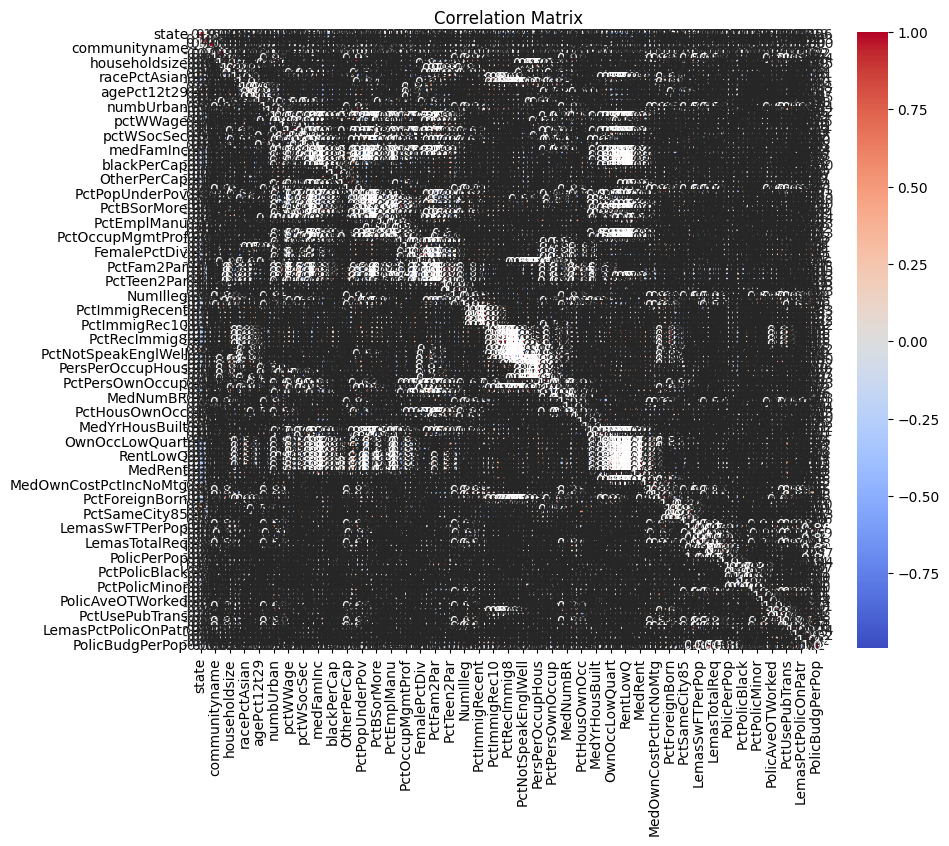

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Inspect the data
print("First few rows of the dataset:")
print(X.head())
print("\nData Info:")
print(X.info())

# Replace invalid values or fill NaNs
X.replace("?", float("nan"), inplace=True)  # Replace "?" with NaN
X = X.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric
X.fillna(X.mean(), inplace=True)  # Replace NaN with column mean

# Validate data after cleaning
print("\nCleaned Data Info:")
print(X.info())
print("\nSummary Statistics:")
print(X.describe())

# Plot correlation matrix
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [35]:
# Support Vector Machine Classifier Manual
class SupportVectorMachineClassifierManual:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X_train, y_train):
        num_samples, num_features = X_train.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Training the SVM
        for _ in range(self.epochs):
            for idx, x_i in enumerate(X_train):
                condition = y_train[idx] * (np.dot(x_i, self.weights) - self.bias) >= 1
                if condition:
                    self.weights -= self.learning_rate * (2 * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * self.weights - np.dot(x_i, y_train[idx]))
                    self.bias -= self.learning_rate * y_train[idx]

    def predict(self, X_test):
        return np.sign(np.dot(X_test, self.weights) - self.bias)

In [39]:
# ---- Task 3: Evaluation Metrics ----
import numpy as np
# Evaluation Metrics (Sensitivity, Specificity, etc.)
def compute_metrics(y_true, y_pred):
    # Confusion Matrix components
    tp = np.sum((y_true == 1) & (y_pred == 1))  # True Positive
    tn = np.sum((y_true == 0) & (y_pred == 0))  # True Negative
    fp = np.sum((y_true == 0) & (y_pred == 1))  # False Positive
    fn = np.sum((y_true == 1) & (y_pred == 0))  # False Negative

    # Calculating Evaluation Metrics
    sensitivity = tp / (tp + fn)  # True Positive Rate
    specificity = tn / (tn + fp)  # True Negative Rate
    fpr = fp / (fp + tn)  # False Positive Rate
    fnr = fn / (fn + tp)  # False Negative Rate
    precision = tp / (tp + fp)  # Precision
    recall = tp / (tp + fn)  # Recall
    f1_score = 2 * (precision * recall) / (precision + recall)  # F1 Score

    return {
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "FPR": fpr,
        "FNR": fnr,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1_score
    }

# Example Usage (You need to replace y_true and y_pred with actual values)
# Assuming you have arrays of true labels and predicted labels
y_true = np.array([1, 0, 1, 1, 0])  # Replace with your actual true labels
y_pred = np.array([1, 0, 1, 0, 0])  # Replace with your actual predictions

# Compute the metrics
metrics = compute_metrics(y_true, y_pred)

# Print the metrics
print("\nEvaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")



Evaluation Metrics:
Sensitivity: 0.6667
Specificity: 1.0000
FPR: 0.0000
FNR: 0.3333
Precision: 1.0000
Recall: 0.6667
F1 Score: 0.8000


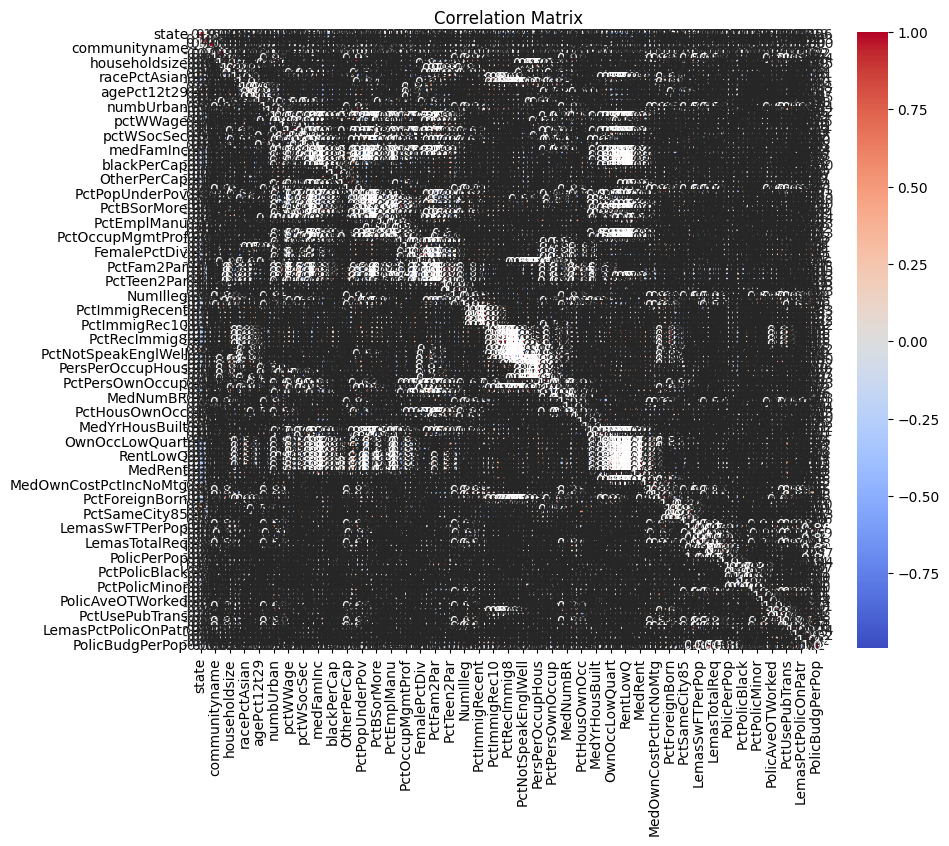

In [40]:
def compute_confusion_matrix(y_true, y_pred, n_classes=2):
    matrix = np.zeros((n_classes, n_classes))
    for i in range(len(y_true)):
        matrix[int(y_true[i]), int(y_pred[i])] += 1
    return matrix

# Plot Confusion Matrix using Seaborn Heatmap
def plot_confusion_matrix(matrix):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

# ---- Task 5: Correlation Matrix ----
# Plot correlation matrix
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()